In [16]:
import chickpea
import numpy as np
import legume
import matplotlib.pyplot as plt
%load_ext memory_profiler

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


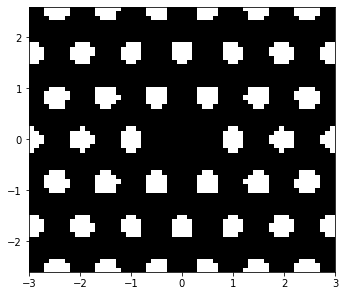

In [17]:
N=30

thickness = 0.4355
D=thickness
radius=0.234
eps = 2.21**2

pcc = chickpea.PhotonicCrystalCavity('H', supercell_size=(6,6),
                                       radius=radius,
                                       thickness= thickness,
                                       eps=eps, n=1)

phc = pcc.cavity()

eps_dist=legume.viz.eps_xy(phc, Nx=2*N, Ny=2*N)

lattice = phc.lattice
phc2= legume.PhotCryst(lattice)
phc2.add_layer(d=thickness, layer_type='freeform')

phc2.initialize_ff_layer(eps_dist)

In [18]:
gme = legume.GuidedModeExp(phc, mode='grid',res=eps_dist.shape)
gme2=legume.GuidedModeExp(phc2, mode='grid', res=eps_dist.shape)
gme3=legume.GuidedModeExp(phc, gmax=7)

In [19]:
eps_1=np.real_if_close(gme.get_eps_xy(z=D/2, Nx=2*N,Ny=2*N)[0], tol=1000)
eps_2=np.real_if_close(gme2.get_eps_xy(z=D/2, Nx=2*N,Ny=2*N)[0], tol=1000)

<ipython-input-20-9c0e82e7b647>:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


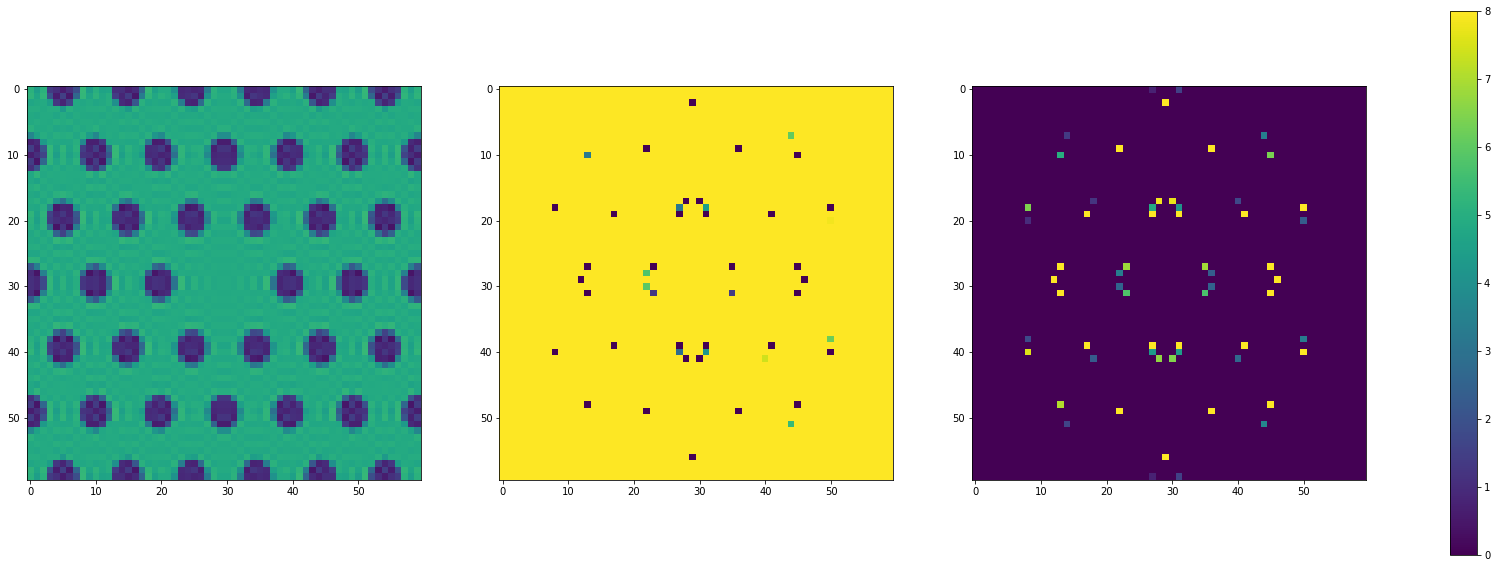

In [20]:
shift=N
fig, ax = plt.subplots(1,3,figsize=(30,10))



pos1=ax[0].imshow(eps_1, vmin=0, vmax=8)
pos2=ax[1].imshow(eps_2, vmin=0, vmax=8)
pos3=ax[2].imshow(eps_1-eps_2, vmin=-8, vmax=8)

fig.colorbar(pos1, ax=ax.ravel().tolist())
fig.show()


In [21]:
options = {'verbose': True,
           'gmode_inds': [0], # This is a TE band gap and we assume that there are no higher order modes.
           'gradients': 'approx', # We don't need exact gradients at this time.
           'numeig': 1, # We happen to know this is a good number to fill the band gap.
                         # Run with higher value until you save modes outside of the band gap.
           'eig_solver': 'eigsh',
           'eig_sigma': 0.416, # We target the center of the band gap
           'compute_im': True # We only want to calculate the loss rates for cavity modes.
           }
%memit gme2.run(kpoints=np.array([[0],[0]]), **options)

0.8898s total time for real part of frequencies, of which
  0.0820s for guided modes computation using the gmode_compute='exact' method
  0.1111s for inverse matrix of Fourier-space permittivity
  0.1400s for matrix diagionalization using the 'eigsh' solver
0.0280s for imaginary part computation
peak memory: 332.06 MiB, increment: 185.95 MiB


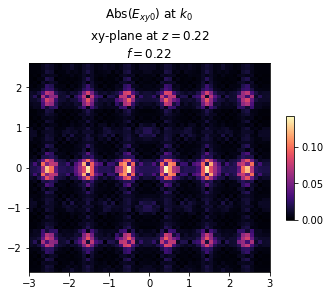

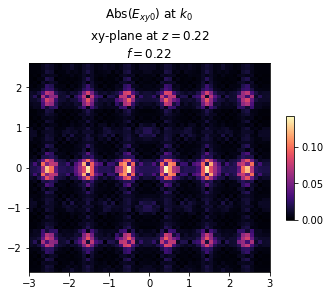

In [22]:
legume.viz.field(gme2, 'e', 0, 0, z=thickness/2, component='xy', val='abs', N1=2*N-1, N2=2*N-1, norm=True, mode='DFT',
                 eps=False)


In [23]:
Q=gme2.freqs/2/gme2.freqs_im

In [24]:
%memit gme3.run(kpoints=np.array([[0],[0]]), **options)

36.5092s total time for real part of frequencies, of which
  0.4250s for guided modes computation using the gmode_compute='exact' method
  4.4722s for inverse matrix of Fourier-space permittivity
  4.2181s for matrix diagionalization using the 'eigsh' solver
0.9630s for imaginary part computation
peak memory: 6954.39 MiB, increment: 6757.66 MiB


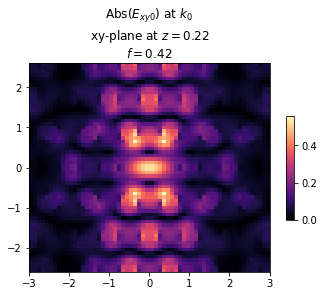

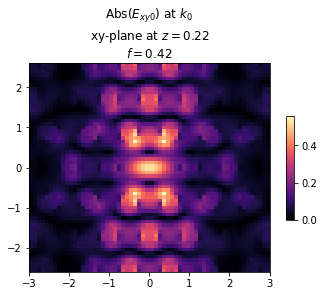

In [25]:
legume.viz.field(gme3, 'e', 0, 0, z=thickness/2, component='xy', val='abs', N1=2*N, N2=2*N, norm=True, mode='DFT',
                 eps=False)
#